In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Ignoring Warning library
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Project_CSE440/A/diabetes.csv")

In [5]:
data.shape

(768, 9)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
## number of unique values 
# heart.nunique()
for cols in data.columns:
    unique_vals = data[cols].unique()
    if len(unique_vals) <= 0:
        print("", cols, " : ", len(unique_vals), " unique values: ", unique_vals)
    else:
        print("", cols, " : ", len(unique_vals), " unique values")

 Pregnancies  :  17  unique values
 Glucose  :  136  unique values
 BloodPressure  :  47  unique values
 SkinThickness  :  51  unique values
 Insulin  :  186  unique values
 BMI  :  248  unique values
 DiabetesPedigreeFunction  :  517  unique values
 Age  :  52  unique values
 Outcome  :  2  unique values


In [10]:
## Rename
data.rename(columns={"Outcome": "Target"},inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbca2f08e10>,
      dtype=object)

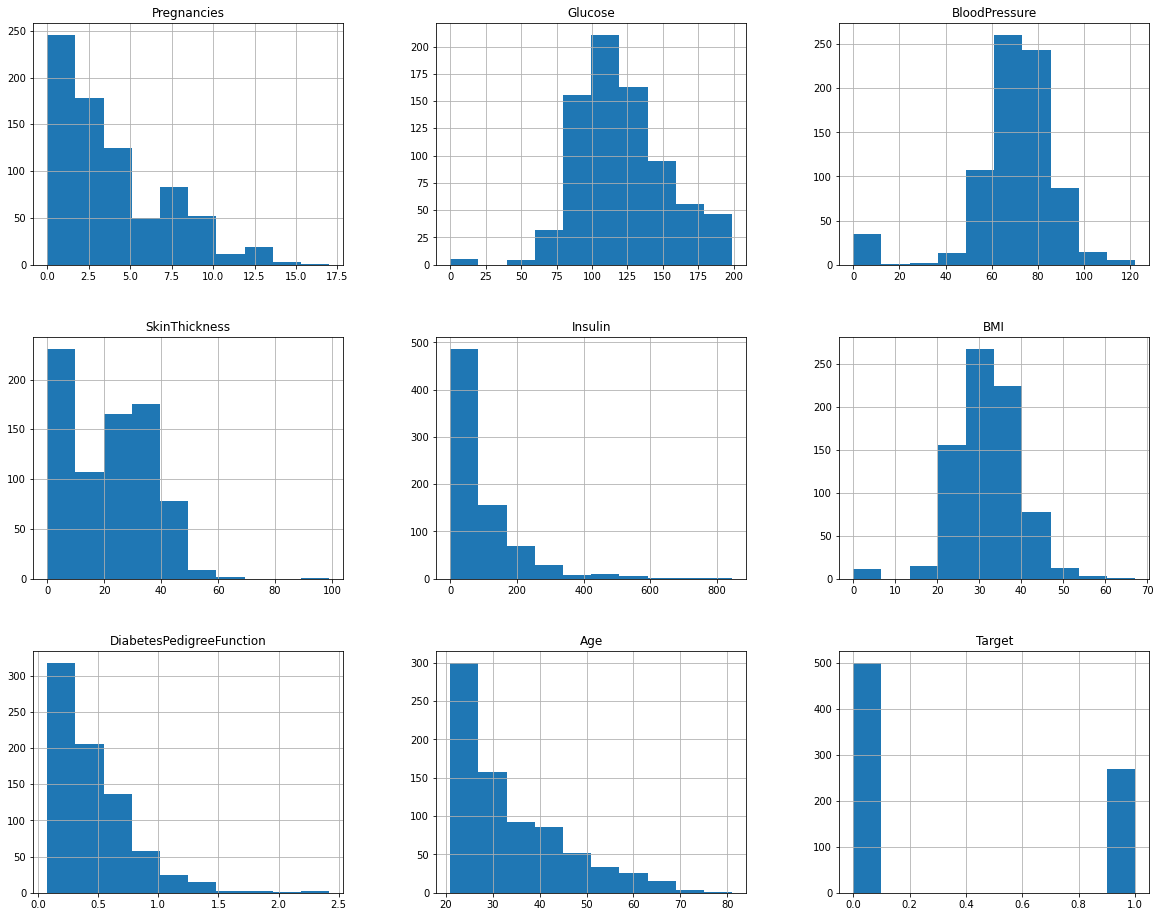

In [12]:
# histogram
data.hist(bins=10,figsize=(20,16))

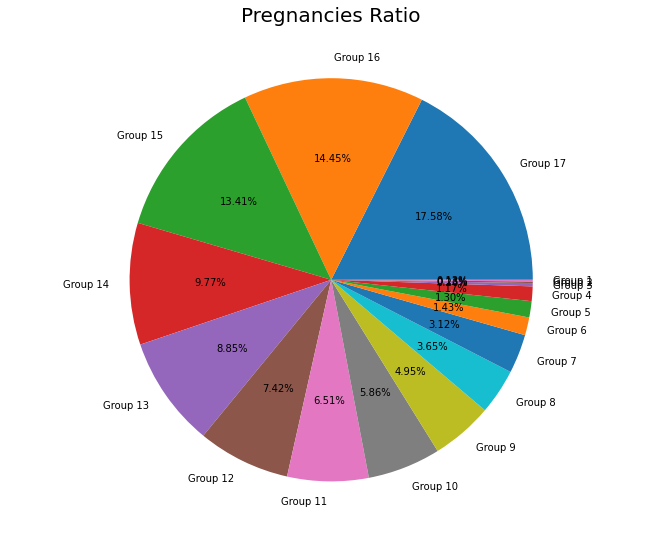

In [13]:
# Piechart for Pregnancies
Pie_Pregnancies = data['Pregnancies'].value_counts().rename_axis('a').reset_index(name='b')
# Set Lables and Values
your_lables = Pie_Pregnancies.a
your_values = Pie_Pregnancies.b
fig = plt.figure(figsize=(9,7))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
t_explode= [0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
# ax.pie(your_values, labels=your_lables , autopct='%1.2f%%',explode=t_explode)
ax.pie(your_values, labels = ['Group 17','Group 16','Group 15','Group 14','Group 13','Group 12','Group 11','Group 10','Group 9','Group 8','Group 7','Group 6','Group 5','Group 4','Group 3','Group 2','Group 1',], autopct='%1.2f%%',explode=t_explode)
ax.set_title("Pregnancies Ratio", size=20)
plt.show() 

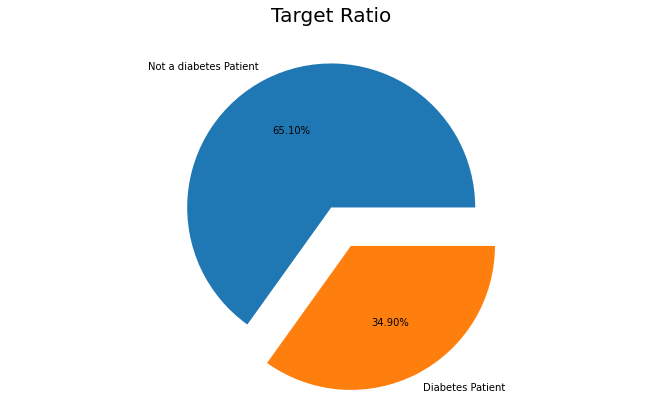

In [14]:
dataT = data['Target'].value_counts().rename_axis('a').reset_index(name='b')
# Set Lables and Values
your_lables = dataT.a
your_values = dataT.b
fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
t_explode= [0.0, 0.3]
ax.pie(your_values, labels= ['Not a diabetes Patient','Diabetes Patient'] , autopct='%1.2f%%',explode=t_explode)
ax.set_title("Target Ratio", size=20)
plt.show() 

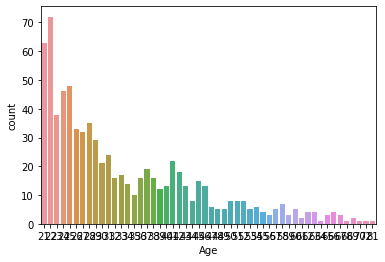

In [15]:
sns.countplot(x = 'Age', data = data)

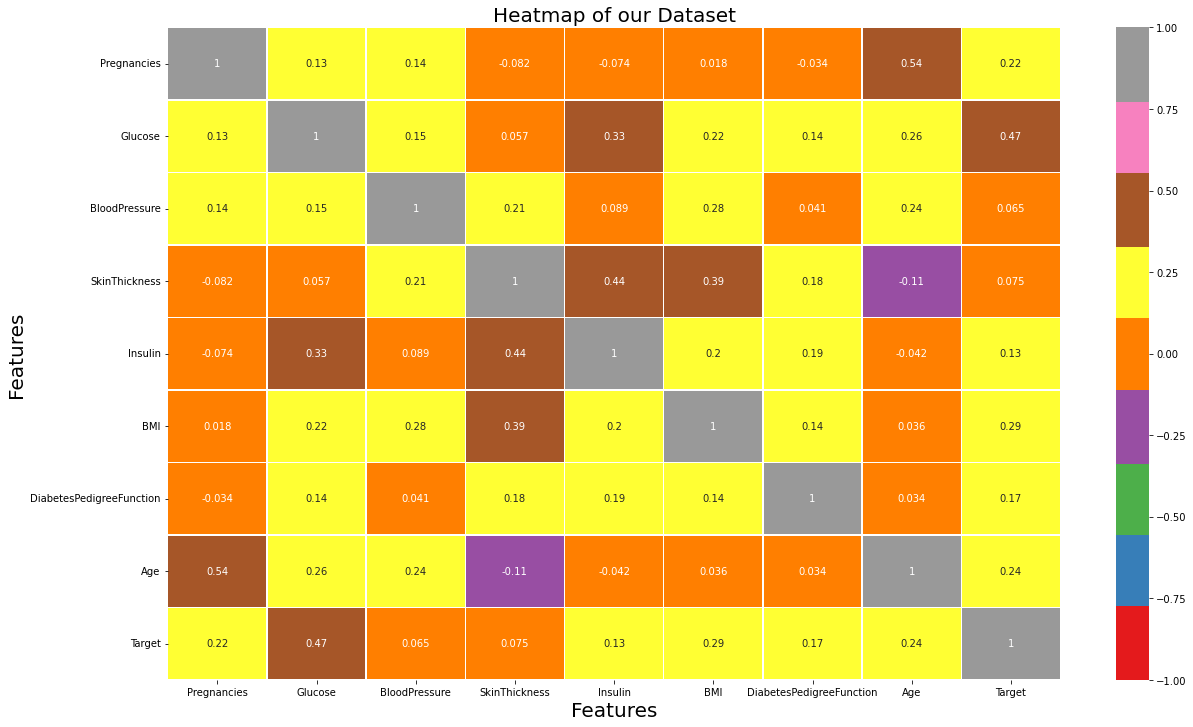

In [16]:
## FIND Correletion
# data.corr()
ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(data.corr(), cmap="Set1", center=0, linewidths=.5, annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of our Dataset', fontsize = 20) 
plt.xlabel('Features', fontsize = 20) 
plt.ylabel('Features', fontsize = 20) 
plt.show()

In [17]:
## Finding correlation for Target 
correlation = data.corr()
correlation['Target'].sort_values(ascending=False)

Target                      1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Target, dtype: float64

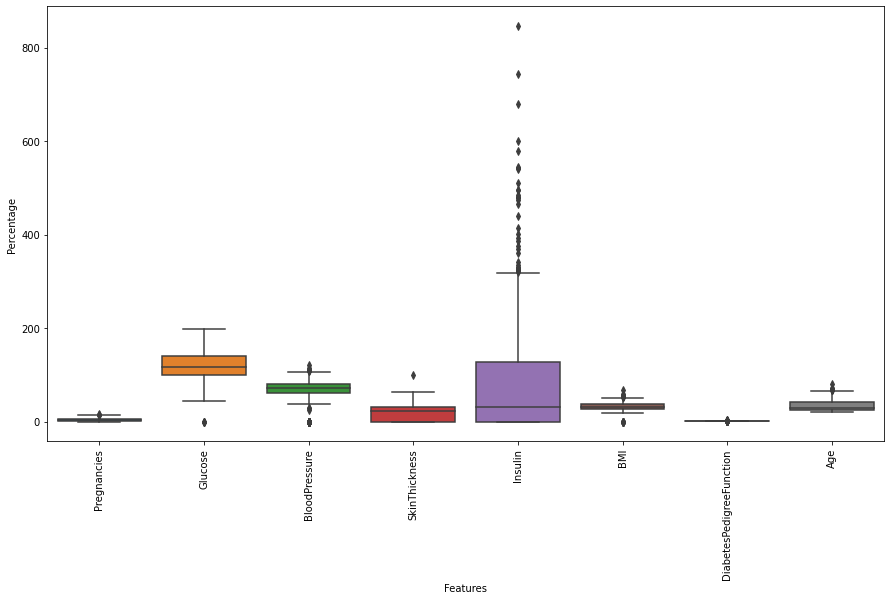

In [18]:
# box plot 
ml_melted = pd.melt(data, id_vars = "Target",
                      var_name = "Features",
                      value_name = "Percentage")
plt.figure(figsize=(15,8))
sns.boxplot(x = "Features", y = "Percentage", data = ml_melted)
plt.xticks(rotation = 90)
plt.show()

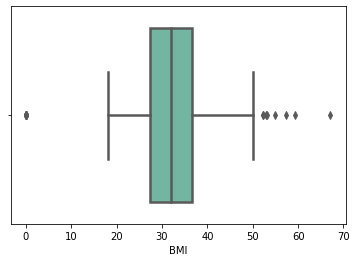

In [19]:
ax = sns.boxplot(x="BMI", data=data, palette="Set2",linewidth=2.5)

In [20]:
print(data['BMI'].quantile(0.5))
print(data['BMI'].quantile(0.65))
print(data['BMI'].quantile(0.75))
print(data['BMI'].quantile(0.95))
print(data['BMI'].quantile(0.99))

32.0
34.5
36.6
44.394999999999996
50.75900000000009


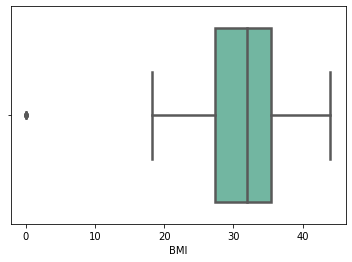

In [21]:
## removing outlier
data['BMI'] = np.where(data['BMI'] > 44, 32.0, data['BMI'])
ax = sns.boxplot(x="BMI", data=data, palette="Set2",linewidth=2.5)

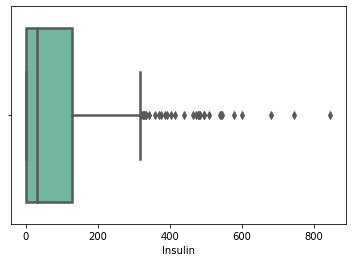

In [22]:
ax = sns.boxplot(x="Insulin", data=data, palette="Set2",linewidth=2.5)

In [23]:
print(data['Insulin'].quantile(0.5))
print(data['Insulin'].quantile(0.65))
print(data['Insulin'].quantile(0.75))
print(data['Insulin'].quantile(0.95))
print(data['Insulin'].quantile(0.99))

30.5
90.0
127.25
293.0
519.9000000000012


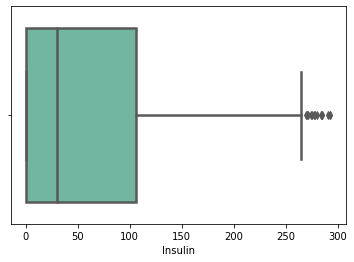

In [24]:
## removing outlier
data['Insulin'] = np.where(data['Insulin'] > 293.0, 30, data['Insulin'])
ax = sns.boxplot(x="Insulin", data=data, palette="Set2",linewidth=2.5)

In [25]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Target'],
      dtype='object')

In [26]:
correlation = data.corr()
correlation['Target'].sort_values(ascending=False)

Target                      1.000000
Glucose                     0.466581
BMI                         0.263607
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
SkinThickness               0.074752
BloodPressure               0.065068
Insulin                     0.064000
Name: Target, dtype: float64

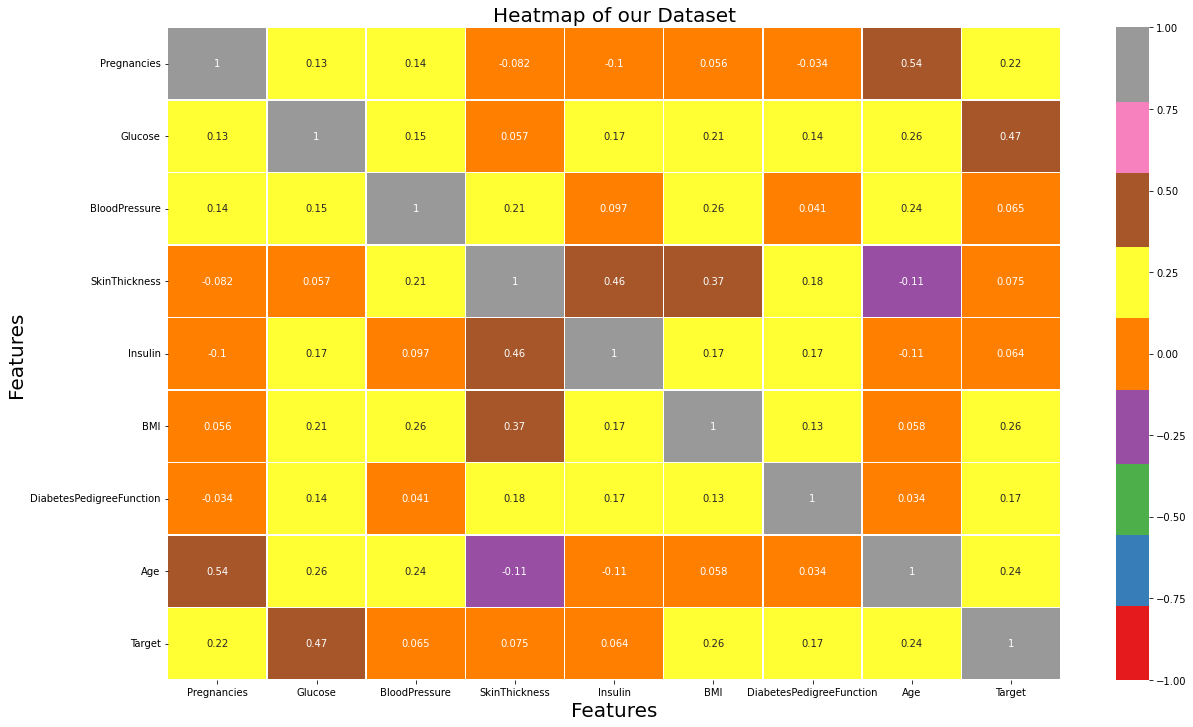

In [27]:
## FIND Correletion
# data.corr()
ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(data.corr(), cmap="Set1", center=0, linewidths=.5, annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of our Dataset', fontsize = 20) 
plt.xlabel('Features', fontsize = 20) 
plt.ylabel('Features', fontsize = 20) 
plt.show()

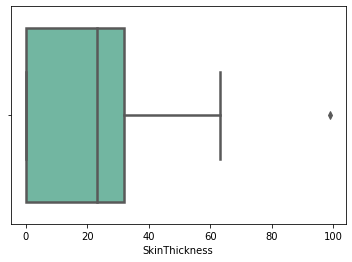

In [28]:
ax = sns.boxplot(x="SkinThickness", data=data, palette="Set2",linewidth=2.5)

In [29]:
print(data['SkinThickness'].quantile(0.5))
print(data['SkinThickness'].quantile(0.65))
print(data['SkinThickness'].quantile(0.75))
print(data['SkinThickness'].quantile(0.95))
print(data['SkinThickness'].quantile(0.99))

23.0
29.0
32.0
44.0
51.33000000000004


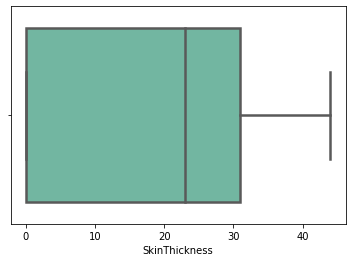

In [30]:
## removing outlier
data['SkinThickness'] = np.where(data['SkinThickness'] > 44.0, 23, data['SkinThickness'])
ax = sns.boxplot(x="SkinThickness", data=data, palette="Set2",linewidth=2.5)

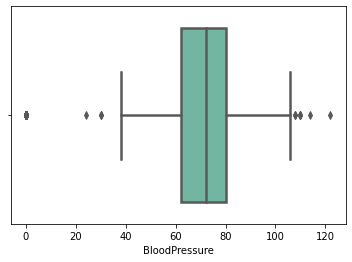

In [31]:
ax = sns.boxplot(x="BloodPressure", data=data, palette="Set2",linewidth=2.5)

In [32]:
print(data['BloodPressure'].quantile(0.5))
print(data['BloodPressure'].quantile(0.65))
print(data['BloodPressure'].quantile(0.75))
print(data['BloodPressure'].quantile(0.95))
print(data['BloodPressure'].quantile(0.99))

72.0
76.0
80.0
90.0
106.0


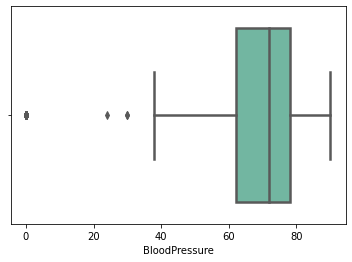

In [33]:
## removing outlier
data['BloodPressure'] = np.where(data['BloodPressure'] > 90.0, 72, data['BloodPressure'])
ax = sns.boxplot(x="BloodPressure", data=data, palette="Set2",linewidth=2.5)

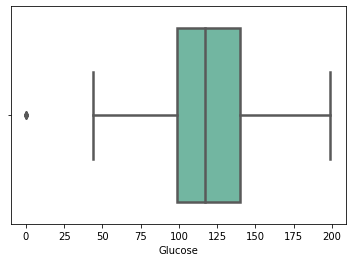

In [34]:
ax = sns.boxplot(x="Glucose", data=data, palette="Set2",linewidth=2.5)

In [35]:
print(data['Glucose'].quantile(0.5))
print(data['Glucose'].quantile(0.65))
print(data['Glucose'].quantile(0.75))
print(data['Glucose'].quantile(0.95))
print(data['Glucose'].quantile(0.99))

117.0
129.0
140.25
181.0
196.0


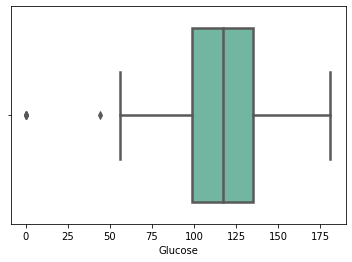

In [36]:
## removing outlier
data['Glucose'] = np.where(data['Glucose'] > 181.0, 117.0, data['Glucose'])
ax = sns.boxplot(x="Glucose", data=data, palette="Set2",linewidth=2.5)

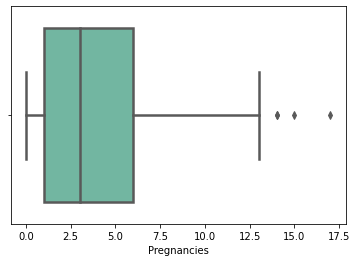

In [37]:
ax = sns.boxplot(x="Pregnancies", data=data, palette="Set2",linewidth=2.5)

In [38]:
print(data['Pregnancies'].quantile(0.5))
print(data['Pregnancies'].quantile(0.65))
print(data['Pregnancies'].quantile(0.75))
print(data['Pregnancies'].quantile(0.95))
print(data['Pregnancies'].quantile(0.99))

3.0
5.0
6.0
10.0
13.0


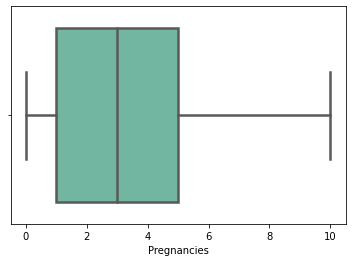

In [39]:
## removing outlier
data['Pregnancies'] = np.where(data['Pregnancies'] > 10.0, 3.0, data['Pregnancies'])
ax = sns.boxplot(x="Pregnancies", data=data, palette="Set2",linewidth=2.5)

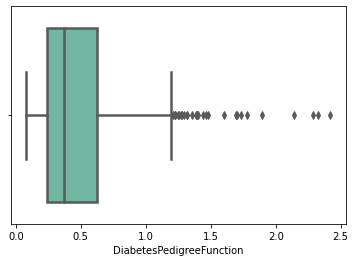

In [40]:
ax = sns.boxplot(x="DiabetesPedigreeFunction", data=data, palette="Set2",linewidth=2.5)

In [41]:
print(data['DiabetesPedigreeFunction'].quantile(0.5))
print(data['DiabetesPedigreeFunction'].quantile(0.65))
print(data['DiabetesPedigreeFunction'].quantile(0.75))
print(data['DiabetesPedigreeFunction'].quantile(0.95))
print(data['DiabetesPedigreeFunction'].quantile(0.99))

0.3725
0.514
0.62625
1.1328499999999997
1.6983300000000001


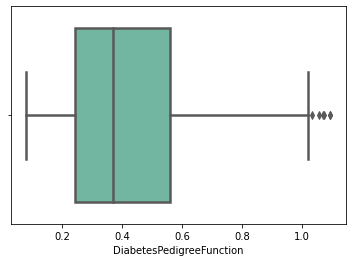

In [42]:
## removing outlier
data['DiabetesPedigreeFunction'] = np.where(data['DiabetesPedigreeFunction'] > 1.1, 0.37, data['DiabetesPedigreeFunction'])
ax = sns.boxplot(x="DiabetesPedigreeFunction", data=data, palette="Set2",linewidth=2.5)

In [43]:
# ax = sns.boxplot(x="Age", data=data, palette="Set2",linewidth=2.5)

In [44]:
# print(data['Age'].quantile(0.5))
# print(data['Age'].quantile(0.65))
# print(data['Age'].quantile(0.75))
# print(data['Age'].quantile(0.95))
# print(data['Age'].quantile(0.99))

In [45]:
## removing outlier
# data['Age'] = np.where(data['Age'] > 58.0, 29.0, data['Age'])
# ax = sns.boxplot(x="Age", data=data, palette="Set2",linewidth=2.5)

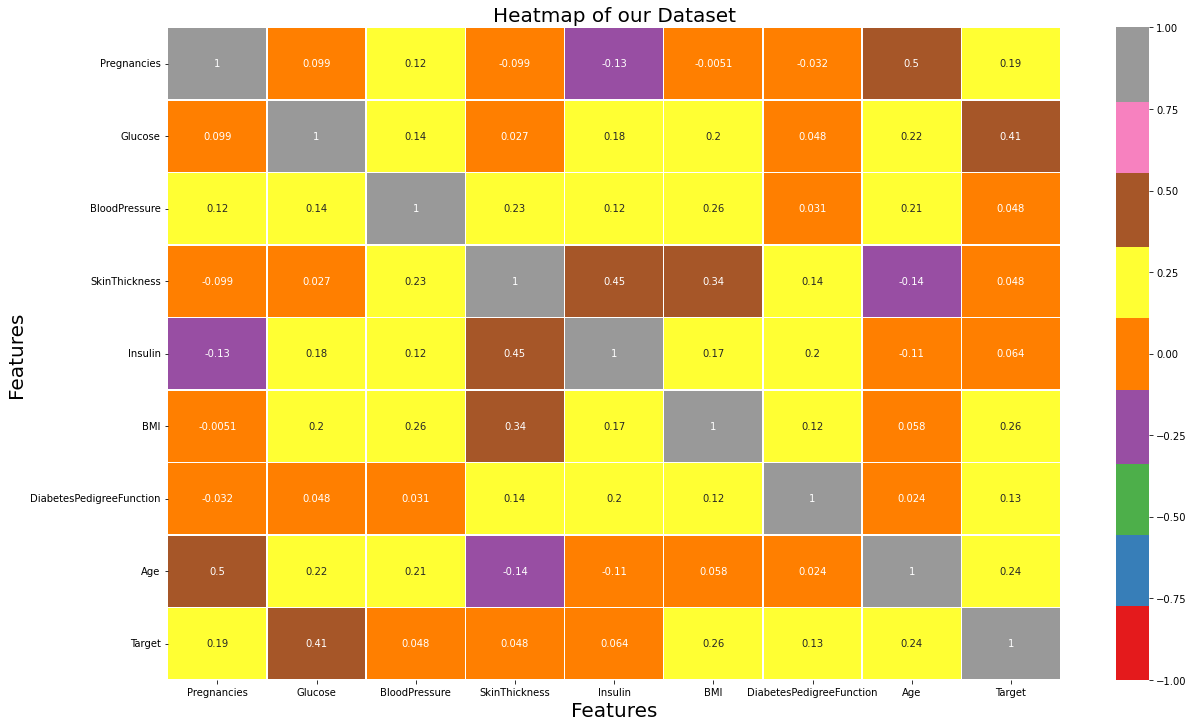

In [46]:
## FIND Correletion
# data.corr()
ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(data.corr(), cmap="Set1", center=0, linewidths=.5, annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of our Dataset', fontsize = 20) 
plt.xlabel('Features', fontsize = 20) 
plt.ylabel('Features', fontsize = 20) 
plt.show()

In [47]:
correlation = data.corr()
correlation['Target'].sort_values(ascending=False)

Target                      1.000000
Glucose                     0.408407
BMI                         0.263607
Age                         0.238356
Pregnancies                 0.188211
DiabetesPedigreeFunction    0.131609
Insulin                     0.064000
SkinThickness               0.048091
BloodPressure               0.047658
Name: Target, dtype: float64

In [48]:
X = data.drop(columns='Target', axis=1)
Y = data['Target']

In [49]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0             72             35        0  33.6   
1            1.0     85.0             66             29        0  26.6   
2            8.0    117.0             64              0        0  23.3   
3            1.0     89.0             66             23       94  28.1   
4            0.0    137.0             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0             76             23      180  32.9   
764          2.0    122.0             70             27        0  36.8   
765          5.0    121.0             72             23      112  26.2   
766          1.0    126.0             60              0        0  30.1   
767          1.0     93.0             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [50]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Target, Length: 768, dtype: int64


In [51]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Target'],
      dtype='object')

In [52]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
k = scaler.fit_transform(X)
X = scaled_df = pd.DataFrame(k,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']  )
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.817680,0.800000,0.795455,0.000000,0.763636,0.539293,0.483333
1,0.1,0.469613,0.733333,0.659091,0.000000,0.604545,0.268173,0.166667
2,0.8,0.646409,0.711111,0.000000,0.000000,0.529545,0.583497,0.183333
3,0.1,0.491713,0.733333,0.522727,0.320819,0.638636,0.087426,0.000000
4,0.0,0.756906,0.444444,0.795455,0.573379,0.979545,0.286837,0.200000


In [53]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

**Train Test split without data balancing & model training**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [56]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LogisticRegression = LogisticRegression()
# training the LogisticRegression model with Training data
LogisticRegression.fit(X_train, y_train)

LogisticRegression()

In [57]:
# accuracy on training data
X_train_prediction = LogisticRegression.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = LogisticRegression.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.745928338762215
Accuracy on Test data :  0.6948051948051948


Classification Report
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       400
           1       0.72      0.45      0.55       214

    accuracy                           0.75       614
   macro avg       0.74      0.68      0.69       614
weighted avg       0.74      0.75      0.73       614

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       100
           1       0.61      0.35      0.45        54

    accuracy                           0.69       154
   macro avg       0.66      0.62      0.62       154
weighted avg       0.68      0.69      0.67       154



[Text(33.0, 0.5, 'Y-Axis'), Text(0.5, 15.0, 'X-Axis')]

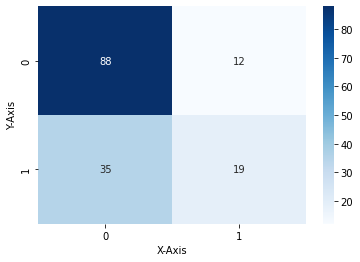

In [58]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report")
print(classification_report(y_train,X_train_prediction))
print("Classification Report")
print(classification_report(y_test, X_test_prediction))

s = sns.heatmap(confusion_matrix(y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
s.set(xlabel='X-Axis', ylabel='Y-Axis')

**Undersampling**

In [59]:
# # Class count
# count_class_0, count_class_1 = data.Target.value_counts()
# # Divide by class
# data_class_0 = data[data['Target'] == 0]
# data_class_1 = data[data['Target'] == 1]
# # Undersample 0-class and concat the DataFrames of both class
# data_class_0_under = data_class_0.sample(count_class_1)
# data_test_under = pd.concat([data_class_0_under,data_class_1], axis=0)
# print('Random under-sampling:')
# print(data_test_under.Target.value_counts())
# X =data_test_under.drop('Target',axis='columns')
# y = data_test_under['Target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# # Number of classes in training Data
# y_train.value_counts()


# Class count
count_class_0, count_class_1 = data.Target.value_counts()
# Divide by class
data_class_0 = data[data['Target'] == 0]
data_class_1 = data[data['Target'] == 1]
# Undersample 0-class and concat the DataFrames of both class
data_class_0_under = data_class_0.sample(count_class_1)
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)
print('Random under-sampling:')
print(data_test_under.Target.value_counts())

# Normalization Min Max
X = data_test_under.drop('Target',axis='columns')
Y = data_test_under['Target']

data_heart_minmax = scaler.fit_transform(X)
X = scaled_df = pd.DataFrame(data_heart_minmax,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']  )

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
# Number of classes in training Data
# Y_train.value_counts()


Random under-sampling:
0    268
1    268
Name: Target, dtype: int64


**LogisticRegression**

Accuracy on Training data :  0.68
Accuracy on Test data :  0.6894409937888198
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.64      0.67       187
           1       0.67      0.72      0.69       188

    accuracy                           0.68       375
   macro avg       0.68      0.68      0.68       375
weighted avg       0.68      0.68      0.68       375

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        81
           1       0.70      0.65      0.68        80

    accuracy                           0.69       161
   macro avg       0.69      0.69      0.69       161
weighted avg       0.69      0.69      0.69       161



[Text(33.0, 0.5, 'Y-Axis'), Text(0.5, 15.0, 'X-Axis')]

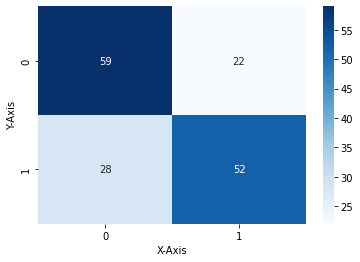

In [60]:
# # # training the LogisticRegression model with Training data
# LogisticRegression.fit(X_train, y_train)
# # accuracy on training data
# X_train_prediction = LogisticRegression.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, y_train)
# print('Accuracy on Training data : ', training_data_accuracy)
# # accuracy on test data
# X_test_prediction = LogisticRegression.predict(X_test)
# test_data_accuracy = accuracy_score(X_test_prediction, y_test)
# print('Accuracy on Test data : ', test_data_accuracy)
# print("Classification Report")
# print(classification_report(y_train,X_train_prediction))
# print("Classification Report")
# print(classification_report(y_test, X_test_prediction))
# s = sns.heatmap(confusion_matrix(y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
# s.set(xlabel='X-Axis', ylabel='Y-Axis')

# training the LogisticRegression model with Training data
LogisticRegression.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = LogisticRegression.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = LogisticRegression.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report")
print(classification_report(Y_train,X_train_prediction))
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

s = sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
s.set(xlabel='X-Axis', ylabel='Y-Axis')

**Oversampling**

In [61]:
# # Oversample 1-class and concat the DataFrames of both classes
# data_class_1_over = data_class_1.sample(count_class_0, replace=True)
# data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)
# print('Random over-sampling:')
# print(data_test_over.Target.value_counts())
# X = data_test_over.drop('Target',axis='columns')
# y = data_test_over['Target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# # Number of classes in training Data
# y_train.value_counts()

In [62]:
# # accuracy on training data
# X_train_prediction = LogisticRegression.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, y_train)
# print('Accuracy on Training data : ', training_data_accuracy)
# # accuracy on test data
# X_test_prediction = LogisticRegression.predict(X_test)
# test_data_accuracy = accuracy_score(X_test_prediction, y_test)
# print('Accuracy on Test data : ', test_data_accuracy)
# print("Classification Report")
# print(classification_report(y_train,X_train_prediction))
# print("Classification Report")
# print(classification_report(y_test, X_test_prediction))
# s = sns.heatmap(confusion_matrix(y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
# s.set(xlabel='X-Axis', ylabel='Y-Axis')

**SMOTE**

In [63]:
# X = data.drop('Target',axis='columns')
# y = data['Target']
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# X_sm, y_sm = smote.fit_resample(X, y)
# y_sm.value_counts()
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm)
# # Number of classes in training Data
# y_train.value_counts()

In [64]:
# accuracy on training data
# X_train_prediction = LogisticRegression.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, y_train)
# print('Accuracy on Training data : ', training_data_accuracy)
# # accuracy on test data
# X_test_prediction = LogisticRegression.predict(X_test)
# test_data_accuracy = accuracy_score(X_test_prediction, y_test)
# print('Accuracy on Test data : ', test_data_accuracy)
# print("Classification Report")
# print(classification_report(y_train, X_train_prediction))
# print("Classification Report")
# print(classification_report(y_test, X_test_prediction))
# s = sns.heatmap(confusion_matrix(y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
# s.set(xlabel='X-Axis', ylabel='Y-Axis')

**RandomForestClassifier**

Accuracy on Training data :  1.0
Accuracy on Test data :  0.7515527950310559
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       188

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        81
           1       0.73      0.80      0.76        80

    accuracy                           0.75       161
   macro avg       0.75      0.75      0.75       161
weighted avg       0.75      0.75      0.75       161



[Text(33.0, 0.5, 'Y-Axis'), Text(0.5, 15.0, 'X-Axis')]

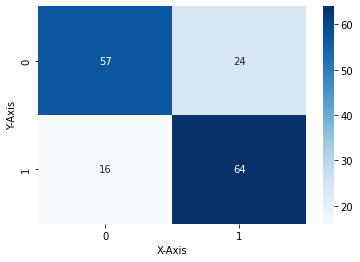

In [65]:
from sklearn.ensemble import RandomForestClassifier
# accuracy on training data
RandomForestClassifier = RandomForestClassifier()
# training the RandomForestClassifier model with Training data
RandomForestClassifier.fit(X_train, Y_train)
X_train_prediction = RandomForestClassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = RandomForestClassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

print("Classification Report")
print(classification_report(Y_train, X_train_prediction))
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

s = sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
s.set(xlabel='X-Axis', ylabel='Y-Axis')

**DecisionTreeClassifier**

Accuracy on Training data :  1.0
Accuracy on Test data :  0.6024844720496895
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       188

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        81
           1       0.59      0.64      0.61        80

    accuracy                           0.60       161
   macro avg       0.60      0.60      0.60       161
weighted avg       0.60      0.60      0.60       161



[Text(33.0, 0.5, 'Y-Axis'), Text(0.5, 15.0, 'X-Axis')]

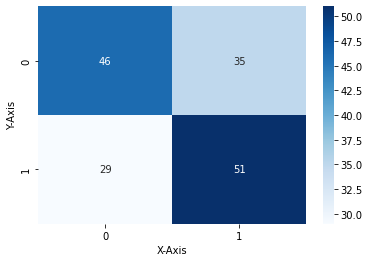

In [66]:
from sklearn.tree import DecisionTreeClassifier
# accuracy on training data
DecisionTreeClassifier = DecisionTreeClassifier()
# training the DecisionTreeClassifier model with Training data
DecisionTreeClassifier.fit(X_train, Y_train)
X_train_prediction = DecisionTreeClassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = DecisionTreeClassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)
print("Classification Report")
print(classification_report(Y_train, X_train_prediction))
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

s = sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
s.set(xlabel='X-Axis', ylabel='Y-Axis')

**GaussianNB**

Accuracy on Training data :  0.696
Accuracy on Test data :  0.7267080745341615
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       187
           1       0.68      0.73      0.71       188

    accuracy                           0.70       375
   macro avg       0.70      0.70      0.70       375
weighted avg       0.70      0.70      0.70       375

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        81
           1       0.71      0.75      0.73        80

    accuracy                           0.73       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.73      0.73      0.73       161



[Text(33.0, 0.5, 'Y-Axis'), Text(0.5, 15.0, 'X-Axis')]

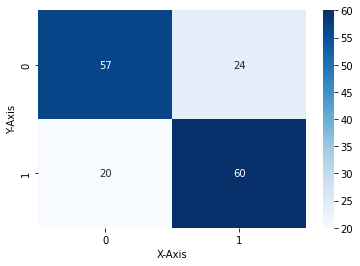

In [67]:
from sklearn.naive_bayes import GaussianNB
# accuracy on training data
GaussianNB = GaussianNB()
# training the Gaussian Naive Bayes model with Training data
GaussianNB.fit(X_train, Y_train)
X_train_prediction = GaussianNB.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = GaussianNB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)
print("Classification Report")
print(classification_report(Y_train, X_train_prediction))
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

s = sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
s.set(xlabel='X-Axis', ylabel='Y-Axis')

**GradientBoostingClassifier**

Accuracy on Training data :  0.8533333333333334
Accuracy on Test data :  0.7267080745341615
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       187
           1       0.84      0.87      0.86       188

    accuracy                           0.85       375
   macro avg       0.85      0.85      0.85       375
weighted avg       0.85      0.85      0.85       375

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        81
           1       0.72      0.74      0.73        80

    accuracy                           0.73       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.73      0.73      0.73       161



[Text(33.0, 0.5, 'Y-Axis'), Text(0.5, 15.0, 'X-Axis')]

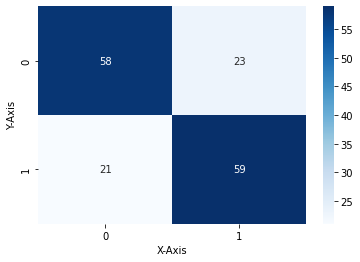

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
# accuracy on training data
GradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# training the GradientBoostingClassifier model with Training data
GradientBoostingClassifier.fit(X_train, Y_train)
X_train_prediction = GradientBoostingClassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = GradientBoostingClassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)
print("Classification Report")
print(classification_report(Y_train, X_train_prediction))
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

s = sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
s.set(xlabel='X-Axis', ylabel='Y-Axis')

**MLPClassifier**

In [69]:
#  def _constrained_optimization(self, obj_func, initial_theta, bounds):
#         if self.optimizer == "fmin_l_bfgs_b":
#             opt_res = scipy.optimize.minimize(
#                 obj_func, initial_theta, method="L-BFGS-B", jac=True,
#                 bounds=bounds)
#             _check_optimize_result("lbfgs", opt_res)
#             theta_opt, func_min = opt_res.x, opt_res.fun
#         elif callable(self.optimizer):
#             theta_opt, func_min = \
#                 self.optimizer(obj_func, initial_theta, bounds=bounds)
#         else:
#             raise ValueError("Unknown optimizer %s." % self.optimizer)

#         return theta_opt, func_min

**MLPClassifier**

Accuracy on Training data :  0.776
Accuracy on Test data :  0.6956521739130435
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       187
           1       0.78      0.78      0.78       188

    accuracy                           0.78       375
   macro avg       0.78      0.78      0.78       375
weighted avg       0.78      0.78      0.78       375

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.70        81
           1       0.69      0.70      0.70        80

    accuracy                           0.70       161
   macro avg       0.70      0.70      0.70       161
weighted avg       0.70      0.70      0.70       161



[Text(33.0, 0.5, 'Y-Axis'), Text(0.5, 15.0, 'X-Axis')]

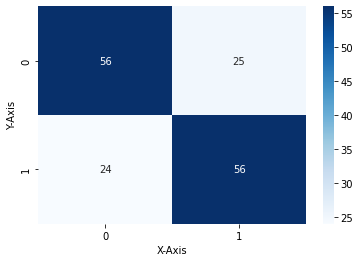

In [70]:
from sklearn.neural_network import MLPClassifier
# accuracy on training data
MLPClassifier = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1, solver='lbfgs')
# training the MLPClassifier model with Training data
MLPClassifier.fit(X_train, Y_train)
X_train_prediction = MLPClassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = MLPClassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)
print("Classification Report")
print(classification_report(Y_train, X_train_prediction))
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

s = sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
s.set(xlabel='X-Axis', ylabel='Y-Axis')

**KNeighborsClassifier**

Accuracy on Training data :  0.7386666666666667
Accuracy on Test data :  0.6708074534161491
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       187
           1       0.71      0.80      0.75       188

    accuracy                           0.74       375
   macro avg       0.74      0.74      0.74       375
weighted avg       0.74      0.74      0.74       375

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        81
           1       0.64      0.76      0.70        80

    accuracy                           0.67       161
   macro avg       0.68      0.67      0.67       161
weighted avg       0.68      0.67      0.67       161



[Text(33.0, 0.5, 'Y-Axis'), Text(0.5, 15.0, 'X-Axis')]

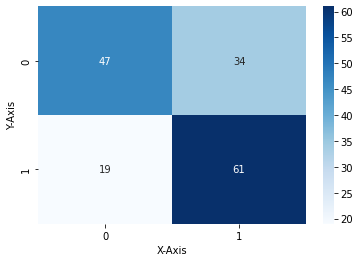

In [71]:
from sklearn.neighbors import KNeighborsClassifier
# accuracy on training data
KNeighborsClassifier = KNeighborsClassifier(n_neighbors=5)
# training the KNeighborsClassifier model with Training data
KNeighborsClassifier.fit(X_train, Y_train)
X_train_prediction = KNeighborsClassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
# accuracy on test data
X_test_prediction = KNeighborsClassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)
print("Classification Report")
print(classification_report(Y_train, X_train_prediction))
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

s = sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True,fmt='d',cmap="Blues")
s.set(xlabel='X-Axis', ylabel='Y-Axis')

**With Pickle**

In [73]:
import pickle
with open('model_pickle', 'wb') as f:
    pickle.dump(RandomForestClassifier,f)
with open('model_pickle', 'rb') as f:
    mp= pickle.load(f)